# Uniform Layering, Constant Load

<IPython.core.display.Javascript object>


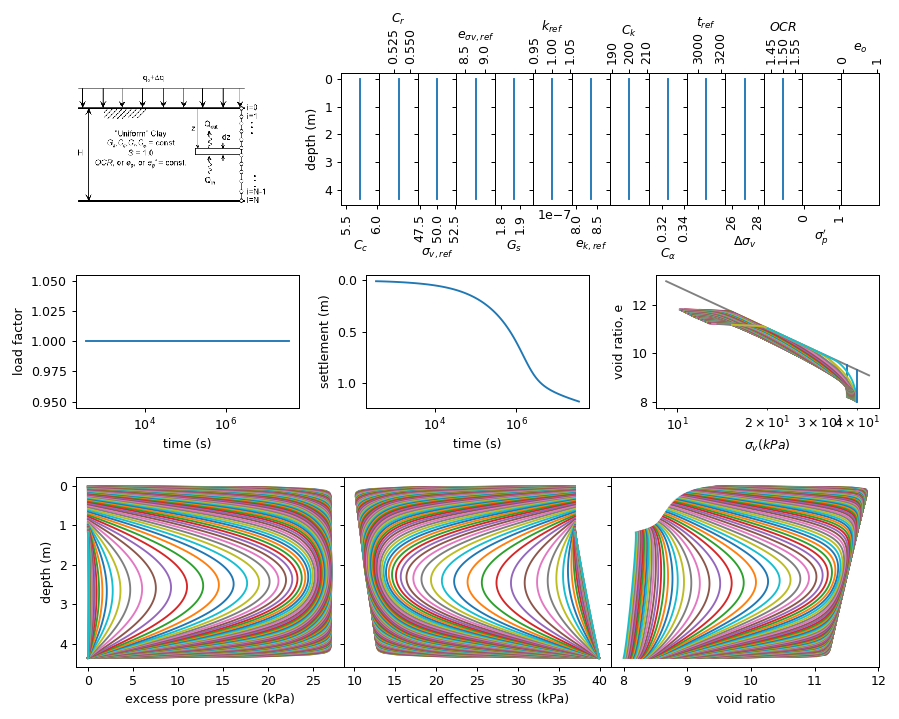

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
import iConsol as icl
from matplotlib import rc

H = 4.35
N = 100

depth = np.linspace(0,H,num=N+1,dtype=np.float)
Cc = np.full(N+1,5.732,dtype=np.float)
Cr = np.full(N+1,0.532,dtype=np.float)
sigvref = np.full(N+1,50,dtype=np.float)
esigvref = np.full(N+1,8.763,dtype=np.float)
Gs = np.full(N+1,1.868,dtype=np.float)
kref = np.full(N+1,1.e-7,dtype=np.float)
ekref = np.full(N+1,8.344,dtype=np.float)
Ck = np.full(N+1,200,dtype=np.float)
Ca = np.full(N+1,0.325,dtype=np.float)
tref = np.full(N+1,3070,dtype=np.float)
dsigv = np.full(N+1,27,dtype=np.float)
ocrvoidratiotype = np.full(N+1,0,dtype=np.int)
ocrvoidratio = np.full(N+1,1.5,dtype=np.float)
ru = np.full(N+1,0,dtype=np.float)
tmax = 35532000
Ntime = 100
time = np.logspace(np.log10(tmax)-5,np.log10(tmax),num=Ntime)
loadfactor = np.full(Ntime,1.0,dtype=np.float)
qo=10
gammaw = 9.81
pa = 101.325
tol = 1.0e-8

OCR = []
sigmap = []
eo = []
for i in range(N+1):
    if(ocrvoidratiotype[i]==0):
        OCR.append(ocrvoidratio[i])
        sigmap.append(None)
        eo.append(None)
    if(ocrvoidratiotype[i]==1):
        eo.append(ocrvoidratio[i])
        OCR.append(None)
        sigmap.append(None)
    if(ocrvoidratiotype[i]==2):
        sigmap.append(ocrvoidratio[i])
        OCR.append(None)
        eo.append(None)
inputs = [Cc,Cr,sigvref,esigvref,Gs,kref,ekref,Ck,Ca,tref,dsigv,OCR,sigmap,eo]
input_labels = [r'$C_c$',r'$C_r$',r'$\sigma_{v,ref}$',r'$e_{\sigma v,ref}$',r'$G_s$',r'$k_{ref}$',r'$e_{k,ref}$',r'$C_k$',r'$C_\alpha$',r'$t_{ref}$',r'$\Delta\sigma_v$',r'$OCR$',r"$\sigma_p'$",r'$e_o$']
        
z,u,sigv,e,time,depth,Eo,sigvo,sigvf = icl.compute(depth=depth,Cc=Cc,Cr=Cr,sigvref=sigvref,esigvref=esigvref,Gs=Gs,kref=kref,ekref=ekref,Ck=Ck,Ca=Ca,tref=tref,qo=qo,dsigv=dsigv,ocrvoidratiotype=ocrvoidratiotype,ocrvoidratio=ocrvoidratio,time=time,loadfactor=loadfactor,drainagetype=0,ru=ru,pa=pa,tol=tol)
fig1 = plt.figure(constrained_layout=False,figsize=(10,8))
gs = fig1.add_gridspec(ncols=1, nrows=3, figure=fig1, height_ratios=[0.7,0.7,1.0])
gs_top = gs[0].subgridspec(ncols=2,nrows=1,width_ratios=[1,2.8])
gs_top2 = gs_top[1].subgridspec(ncols=14,nrows=1,wspace=0)
gs_middle = gs[1].subgridspec(ncols=3,nrows=1,wspace=0.3)
gs_bottom = gs[2].subgridspec(ncols=3,nrows=1,wspace=0)
img = mpimg.imread('Fig3.png')
ax11 = fig1.add_subplot(gs_top[0])
plt.imshow(img)
plt.axis('off')
ax_top = []
for i in range(14):
    if(i==0):
        ax_top.append(fig1.add_subplot(gs_top2[0,i]))
    else:
        ax_top.append(fig1.add_subplot(gs_top2[0,i],sharey=ax_top[0]))
    ax_top[i].plot(inputs[i],depth)
    ax_top[i].set_xlabel(input_labels[i])
    ax_top[i].tick_params(labelleft=False)
    if(i%2==1):
        ax_top[i].xaxis.tick_top()
        ax_top[i].xaxis.set_label_position('top')
    plt.xticks(rotation=90)
ax_top[0].set_ylabel('depth (m)')
ax_top[0].tick_params(labelleft=True)
ax_top[0].invert_yaxis()

NCL_x = [np.min([sigvref[0]*10**((esigvref[0]-0.9*np.min(e))/Cc[0]),1.1*np.max(sigv)]),np.max([sigvref[0]*10**((esigvref[0]-1.1*np.max(e))/Cc[0]),0.9*np.min(sigv)])]
NCL_y = [esigvref[0]-Cc[0]*np.log10(NCL_x[0]/sigvref[0]),esigvref[0]-Cc[0]*np.log10(NCL_x[1]/sigvref[0])]
ax11 = fig1.add_subplot(gs_middle[0,0])
ax11.plot(time,loadfactor)
ax11.set_xlabel('time (s)')
ax11.set_ylabel('load factor')
ax11.set_xscale('log')
ax12 = fig1.add_subplot(gs_middle[0,1])
ax12.plot(time,z[0])
ax12.invert_yaxis()
ax12.set_xscale('log')
ax12.set_xlabel('time (s)')
ax12.set_ylabel('settlement (m)')
ax13 = fig1.add_subplot(gs_middle[0,2])
ax13.plot(NCL_x,NCL_y,color='gray')
ax13.plot(np.transpose(sigv),np.transpose(e))
ax13.set_xscale('log')
ax13.set_xlabel(r'$\sigma_v (kPa)$')
ax13.set_ylabel('void ratio, e')
ax21 = fig1.add_subplot(gs_bottom[0,0])
ax22 = fig1.add_subplot(gs_bottom[0,1])
ax23 = fig1.add_subplot(gs_bottom[0,2])
ax21.plot(u,z)
ax21.invert_yaxis()
ax21.set_ylabel('depth (m)')
ax21.set_xlabel('excess pore pressure (kPa)')
ax22.plot(sigv,z)
ax22.invert_yaxis()
ax22.set_xlabel('vertical effective stress (kPa)')
ax22.tick_params(labelleft=False)
ax23.plot(e,z)
ax23.invert_yaxis()
ax23.set_xlabel('void ratio')
ax23.tick_params(labelleft=False)
fig1.tight_layout()
plt.show()

# Layered System, Constant Load

<IPython.core.display.Javascript object>


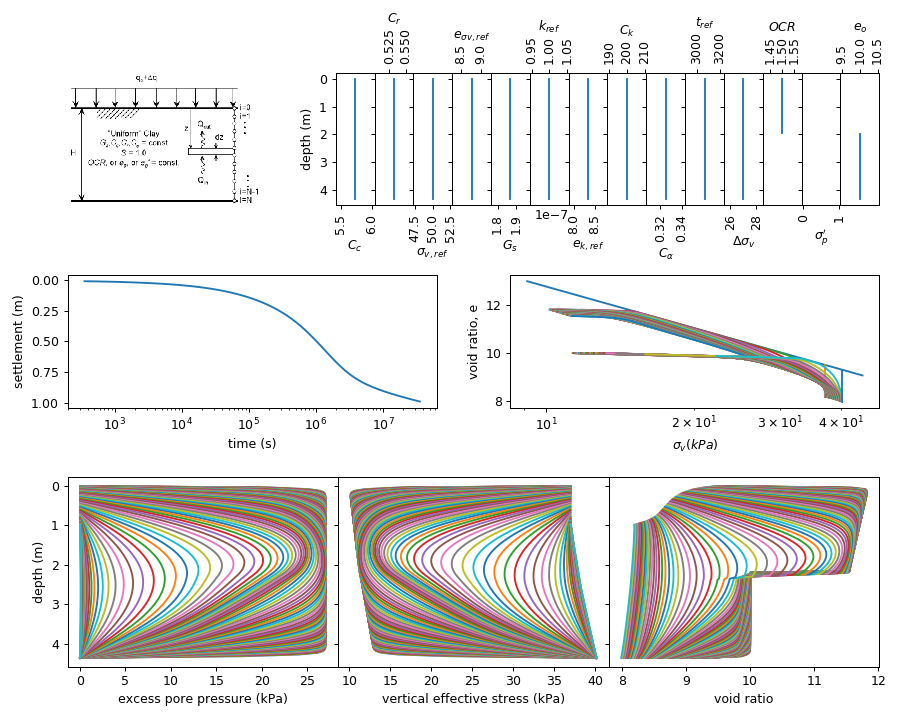

In [4]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
import iConsol as icl
from matplotlib import rc

H1 = 2.0
H2 = 2.35
N1 = 50
N2 = 50
Cc1 = 5.729
depth1 = np.linspace(0,H1,num=N1,dtype=np.float,endpoint=False)
depth2 = np.linspace(H1,H1+H2,num=N2,dtype=np.float)
depth = np.hstack((depth1,depth2))
N = depth.size-1
Cc = np.full(N+1,5.729,dtype=np.float)
Cr = np.full(N+1,0.532,dtype=np.float)
sigvref = np.full(N+1,50,dtype=np.float)
esigvref = np.full(N+1,8.763,dtype=np.float)
Gs = np.full(N+1,1.868,dtype=np.float)
kref = np.full(N+1,1.e-7,dtype=np.float)
ekref = np.full(N+1,8.344,dtype=np.float)
Ck = np.full(N+1,200,dtype=np.float)
Ca = np.full(N+1,0.325,dtype=np.float)
tref = np.full(N+1,3070,dtype=np.float)
dsigv = np.full(N+1,27,dtype=np.float)
ocrvoidratiotype = np.hstack((np.full(N1,0,dtype=np.int),np.full(N2+1,1,dtype=np.int)))
ocrvoidratio = np.hstack((np.full(N1,1.5,dtype=np.float),np.full(N1,10.0,dtype=np.float)))
ru = np.full(N+1,0,dtype=np.float)
tmax = 35532000
Ntime = 100
time = np.logspace(np.log10(tmax)-5,np.log10(tmax),num=Ntime)
loadfactor = np.full(Ntime,1.0,dtype=np.float)
qo=10
gammaw = 9.81
pa = 101.325
tol = 1.0e-8

OCR = []
sigmap = []
eo = []
for i in range(depth.size):
    if(ocrvoidratiotype[i]==0):
        OCR.append(ocrvoidratio[i])
        sigmap.append(None)
        eo.append(None)
    if(ocrvoidratiotype[i]==1):
        eo.append(ocrvoidratio[i])
        OCR.append(None)
        sigmap.append(None)
    if(ocrvoidratiotype[i]==2):
        sigmap.append(ocrvoidratio[i])
        OCR.append(None)
        eo.append(None)
inputs = [Cc,Cr,sigvref,esigvref,Gs,kref,ekref,Ck,Ca,tref,dsigv,OCR,sigmap,eo]
input_labels = [r'$C_c$',r'$C_r$',r'$\sigma_{v,ref}$',r'$e_{\sigma v,ref}$',r'$G_s$',r'$k_{ref}$',r'$e_{k,ref}$',r'$C_k$',r'$C_\alpha$',r'$t_{ref}$',r'$\Delta\sigma_v$',r'$OCR$',r"$\sigma_p'$",r'$e_o$']
        
z,u,sigv,e,time,depth,Eo,sigvo,sigvf = icl.compute(depth=depth,Cc=Cc,Cr=Cr,sigvref=sigvref,esigvref=esigvref,Gs=Gs,kref=kref,ekref=ekref,Ck=Ck,Ca=Ca,tp=tref,qo=qo,dsigv=dsigv,ocrvoidratiotype=ocrvoidratiotype,ocrvoidratio=ocrvoidratio,time=time,loadfactor=loadfactor,drainagetype=0,ru=ru,pa=pa,tol=tol)
fig2 = plt.figure(constrained_layout=False,figsize=(10,8))
gs = fig2.add_gridspec(ncols=1, nrows=3, figure=fig2, height_ratios=[0.7,0.7,1.0])
gs_top = gs[0].subgridspec(ncols=2,nrows=1,width_ratios=[1,2.8])
gs_top2 = gs_top[1].subgridspec(ncols=14,nrows=1,wspace=0)
gs_middle = gs[1].subgridspec(ncols=2,nrows=1)
gs_bottom = gs[2].subgridspec(ncols=3,nrows=1,wspace=0)
img = mpimg.imread('Fig3.png')
ax11 = fig2.add_subplot(gs_top[0])
plt.imshow(img)
plt.axis('off')
ax_top = []
for i in range(14):
    if(i==0):
        ax_top.append(fig2.add_subplot(gs_top2[0,i]))
    else:
        ax_top.append(fig2.add_subplot(gs_top2[0,i],sharey=ax_top[0]))
    ax_top[i].plot(inputs[i],depth)
    ax_top[i].set_xlabel(input_labels[i])
    ax_top[i].tick_params(labelleft=False)
    if(i%2==1):
        ax_top[i].xaxis.tick_top()
        ax_top[i].xaxis.set_label_position('top')
    plt.xticks(rotation=90)
ax_top[0].set_ylabel('depth (m)')
ax_top[0].tick_params(labelleft=True)
ax_top[0].invert_yaxis()

NCL_x = [np.min([sigvref[0]*10**((esigvref[0]-0.9*np.min(e))/Cc[0]),1.1*np.max(sigv)]),np.max([sigvref[0]*10**((esigvref[0]-1.1*np.max(e))/Cc[0]),0.9*np.min(sigv)])]
NCL_y = [esigvref[0]-Cc[0]*np.log10(NCL_x[0]/sigvref[0]),esigvref[0]-Cc[0]*np.log10(NCL_x[1]/sigvref[0])]
ax11 = fig2.add_subplot(gs_middle[0,0])
ax11.plot(time,z[0])
ax11.invert_yaxis()
ax11.set_xscale('log')
ax11.set_xlabel('time (s)')
ax11.set_ylabel('settlement (m)')
ax12 = fig2.add_subplot(gs_middle[0,1])
ax12.plot(NCL_x,NCL_y)
ax12.plot(np.transpose(sigv),np.transpose(e))
ax12.set_xscale('log')
ax12.set_xlabel(r'$\sigma_v (kPa)$')
ax12.set_ylabel('void ratio, e')
ax21 = fig2.add_subplot(gs_bottom[0,0])
ax22 = fig2.add_subplot(gs_bottom[0,1])
ax23 = fig2.add_subplot(gs_bottom[0,2])
ax21.plot(u,z)
ax21.invert_yaxis()
ax21.set_ylabel('depth (m)')
ax21.set_xlabel('excess pore pressure (kPa)')
ax22.plot(sigv,z)
ax22.invert_yaxis()
ax22.set_xlabel('vertical effective stress (kPa)')
ax22.tick_params(labelleft=False)
ax23.plot(e,z)
ax23.invert_yaxis()
ax23.set_xlabel('void ratio')
ax23.tick_params(labelleft=False)
fig2.tight_layout()
plt.show()

# Uniform Layer, Time-Dependent Loading

<IPython.core.display.Javascript object>


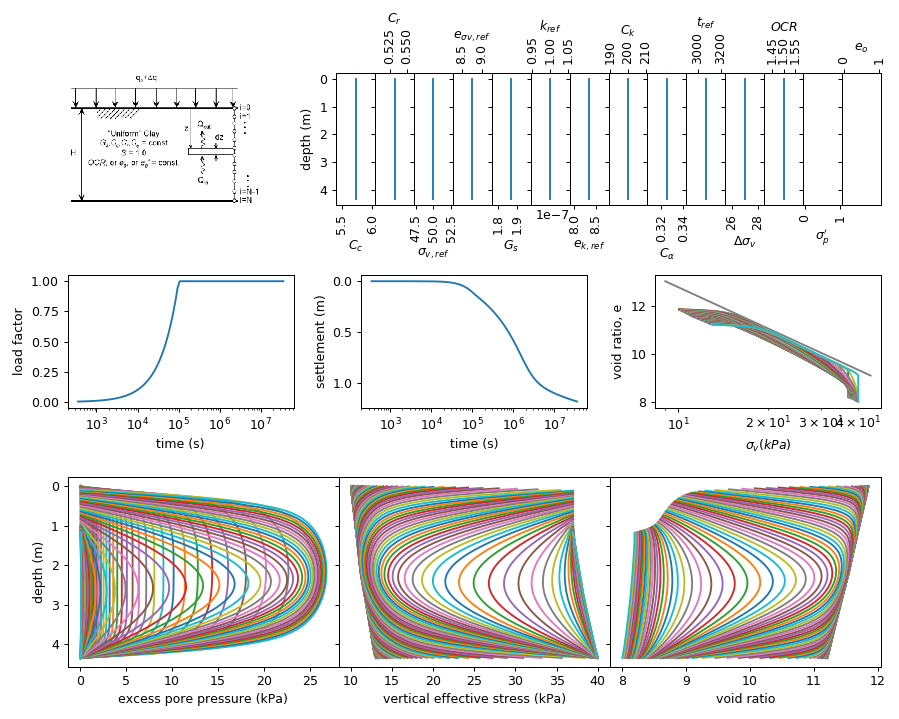

In [7]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
import iConsol as icl
from matplotlib import rc

H = 4.35
N=100
Cc1 = 5.729
depth1 = np.linspace(0,H,num=N,dtype=np.float)
N = depth.size-1
Cc = np.full(N+1,5.729,dtype=np.float)
Cr = np.full(N+1,0.532,dtype=np.float)
sigvref = np.full(N+1,50,dtype=np.float)
esigvref = np.full(N+1,8.763,dtype=np.float)
Gs = np.full(N+1,1.868,dtype=np.float)
kref = np.full(N+1,1.e-7,dtype=np.float)
ekref = np.full(N+1,8.344,dtype=np.float)
Ck = np.full(N+1,200,dtype=np.float)
Ca = np.full(N+1,0.325,dtype=np.float)
tref = np.full(N+1,3070,dtype=np.float)
dsigv = np.full(N+1,27,dtype=np.float)
ocrvoidratiotype = np.full(N+1,0,dtype=np.int)
ocrvoidratio = np.full(N+1,1.5,dtype=np.float)
ru = np.full(N+1,0,dtype=np.float)
tmax = 35532000
Ntime = 100
time = np.logspace(np.log10(tmax)-5,np.log10(tmax),num=Ntime)
loadfactor = []
for t in time:
    if(t<100000):
        loadfactor.append(t/100000)
    else:
        loadfactor.append(1.0)
loadfactor = np.array(loadfactor, dtype=np.float)
qo=10
gammaw = 9.81
pa = 101.325
tol = 1.0e-8

OCR = []
sigmap = []
eo = []
for i in range(depth.size):
    if(ocrvoidratiotype[i]==0):
        OCR.append(ocrvoidratio[i])
        sigmap.append(None)
        eo.append(None)
    if(ocrvoidratiotype[i]==1):
        eo.append(ocrvoidratio[i])
        OCR.append(None)
        sigmap.append(None)
    if(ocrvoidratiotype[i]==2):
        sigmap.append(ocrvoidratio[i])
        OCR.append(None)
        eo.append(None)
inputs = [Cc,Cr,sigvref,esigvref,Gs,kref,ekref,Ck,Ca,tref,dsigv,OCR,sigmap,eo]
input_labels = [r'$C_c$',r'$C_r$',r'$\sigma_{v,ref}$',r'$e_{\sigma v,ref}$',r'$G_s$',r'$k_{ref}$',r'$e_{k,ref}$',r'$C_k$',r'$C_\alpha$',r'$t_{ref}$',r'$\Delta\sigma_v$',r'$OCR$',r"$\sigma_p'$",r'$e_o$']
        
z,u,sigv,e,time,depth,Eo,sigvo,sigvf = icl.compute(depth=depth,Cc=Cc,Cr=Cr,sigvref=sigvref,esigvref=esigvref,Gs=Gs,kref=kref,ekref=ekref,Ck=Ck,Ca=Ca,tp=tref,qo=qo,dsigv=dsigv,ocrvoidratiotype=ocrvoidratiotype,ocrvoidratio=ocrvoidratio,time=time,loadfactor=loadfactor,drainagetype=0,ru=ru,pa=pa,tol=tol)
fig3 = plt.figure(constrained_layout=False,figsize=(10,8))
gs = fig3.add_gridspec(ncols=1, nrows=3, figure=fig3, height_ratios=[0.7,0.7,1.0])
gs_top = gs[0].subgridspec(ncols=2,nrows=1,width_ratios=[1,2.8])
gs_top2 = gs_top[1].subgridspec(ncols=14,nrows=1,wspace=0)
gs_middle = gs[1].subgridspec(ncols=3,nrows=1,wspace=0.3)
gs_bottom = gs[2].subgridspec(ncols=3,nrows=1,wspace=0)
img = mpimg.imread('Fig3.png')
ax11 = fig3.add_subplot(gs_top[0])
plt.imshow(img)
plt.axis('off')
ax_top = []
for i in range(14):
    if(i==0):
        ax_top.append(fig3.add_subplot(gs_top2[0,i]))
    else:
        ax_top.append(fig3.add_subplot(gs_top2[0,i],sharey=ax_top[0]))
    ax_top[i].plot(inputs[i],depth)
    ax_top[i].set_xlabel(input_labels[i])
    ax_top[i].tick_params(labelleft=False)
    if(i%2==1):
        ax_top[i].xaxis.tick_top()
        ax_top[i].xaxis.set_label_position('top')
    plt.xticks(rotation=90)
ax_top[0].set_ylabel('depth (m)')
ax_top[0].tick_params(labelleft=True)
ax_top[0].invert_yaxis()

NCL_x = [np.min([sigvref[0]*10**((esigvref[0]-0.9*np.min(e))/Cc[0]),1.1*np.max(sigv)]),np.max([sigvref[0]*10**((esigvref[0]-1.1*np.max(e))/Cc[0]),0.9*np.min(sigv)])]
NCL_y = [esigvref[0]-Cc[0]*np.log10(NCL_x[0]/sigvref[0]),esigvref[0]-Cc[0]*np.log10(NCL_x[1]/sigvref[0])]
ax11 = fig3.add_subplot(gs_middle[0,0])
ax11.plot(time,loadfactor)
ax11.set_xlabel('time (s)')
ax11.set_ylabel('load factor')
ax11.set_xscale('log')
ax12 = fig3.add_subplot(gs_middle[0,1])
ax12.plot(time,z[0])
ax12.invert_yaxis()
ax12.set_xscale('log')
ax12.set_xlabel('time (s)')
ax12.set_ylabel('settlement (m)')
ax13 = fig3.add_subplot(gs_middle[0,2])
ax13.plot(NCL_x,NCL_y,color='gray')
ax13.plot(np.transpose(sigv),np.transpose(e))
ax13.set_xscale('log')
ax13.set_xlabel(r'$\sigma_v (kPa)$')
ax13.set_ylabel('void ratio, e')
ax21 = fig3.add_subplot(gs_bottom[0,0])
ax22 = fig3.add_subplot(gs_bottom[0,1])
ax23 = fig3.add_subplot(gs_bottom[0,2])
ax21.plot(u,z)
ax21.invert_yaxis()
ax21.set_ylabel('depth (m)')
ax21.set_xlabel('excess pore pressure (kPa)')
ax22.plot(sigv,z)
ax22.invert_yaxis()
ax22.set_xlabel('vertical effective stress (kPa)')
ax22.tick_params(labelleft=False)
ax23.plot(e,z)
ax23.invert_yaxis()
ax23.set_xlabel('void ratio')
ax23.tick_params(labelleft=False)
fig3.tight_layout()
plt.show()

# Layered System, Time-Dependent Loading

<IPython.core.display.Javascript object>


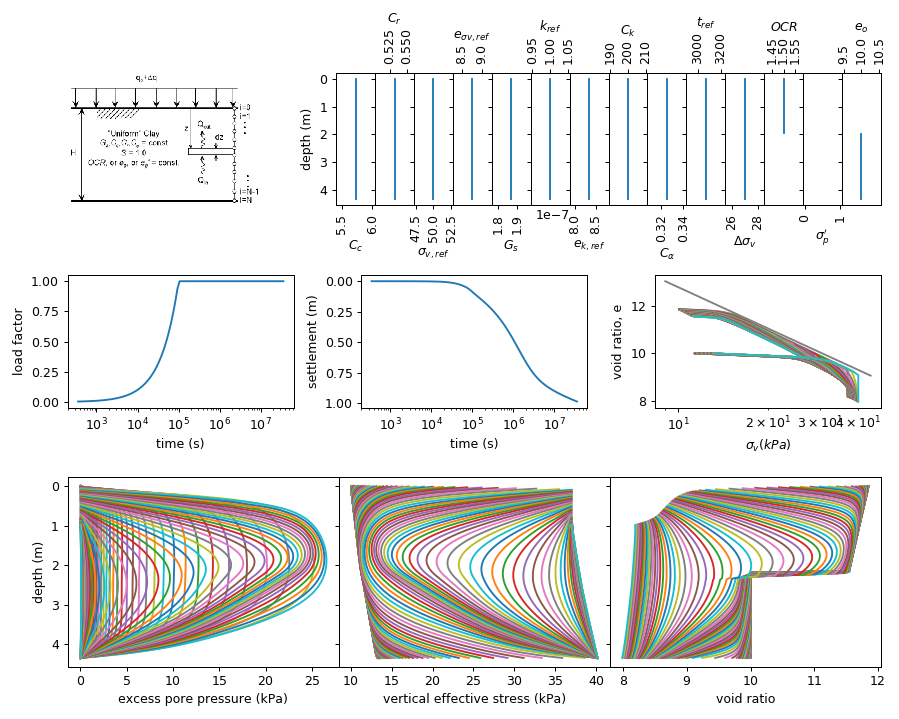

In [6]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
import iConsol as icl
from matplotlib import rc

H1 = 2.0
H2 = 2.35
N1 = 50
N2 = 50
Cc1 = 5.729
depth1 = np.linspace(0,H1,num=N1,dtype=np.float,endpoint=False)
depth2 = np.linspace(H1,H1+H2,num=N2,dtype=np.float)
depth = np.hstack((depth1,depth2))
N = depth.size-1
Cc = np.full(N+1,5.729,dtype=np.float)
Cr = np.full(N+1,0.532,dtype=np.float)
sigvref = np.full(N+1,50,dtype=np.float)
esigvref = np.full(N+1,8.763,dtype=np.float)
Gs = np.full(N+1,1.868,dtype=np.float)
kref = np.full(N+1,1.e-7,dtype=np.float)
ekref = np.full(N+1,8.344,dtype=np.float)
Ck = np.full(N+1,200,dtype=np.float)
Ca = np.full(N+1,0.325,dtype=np.float)
tref = np.full(N+1,3070,dtype=np.float)
dsigv = np.full(N+1,27,dtype=np.float)
ocrvoidratiotype = np.hstack((np.full(N1,0,dtype=np.int),np.full(N2+1,1,dtype=np.int)))
ocrvoidratio = np.hstack((np.full(N1,1.5,dtype=np.float),np.full(N1,10.0,dtype=np.float)))
ru = np.full(N+1,0,dtype=np.float)
tmax = 35532000
Ntime = 100
time = np.logspace(np.log10(tmax)-5,np.log10(tmax),num=Ntime)
loadfactor = []
for t in time:
    if(t<100000):
        loadfactor.append(t/100000)
    else:
        loadfactor.append(1.0)
loadfactor = np.array(loadfactor, dtype=np.float)
qo=10
gammaw = 9.81
pa = 101.325
tol = 1.0e-8

OCR = []
sigmap = []
eo = []
for i in range(depth.size):
    if(ocrvoidratiotype[i]==0):
        OCR.append(ocrvoidratio[i])
        sigmap.append(None)
        eo.append(None)
    if(ocrvoidratiotype[i]==1):
        eo.append(ocrvoidratio[i])
        OCR.append(None)
        sigmap.append(None)
    if(ocrvoidratiotype[i]==2):
        sigmap.append(ocrvoidratio[i])
        OCR.append(None)
        eo.append(None)
inputs = [Cc,Cr,sigvref,esigvref,Gs,kref,ekref,Ck,Ca,tref,dsigv,OCR,sigmap,eo]
input_labels = [r'$C_c$',r'$C_r$',r'$\sigma_{v,ref}$',r'$e_{\sigma v,ref}$',r'$G_s$',r'$k_{ref}$',r'$e_{k,ref}$',r'$C_k$',r'$C_\alpha$',r'$t_{ref}$',r'$\Delta\sigma_v$',r'$OCR$',r"$\sigma_p'$",r'$e_o$']
        
z,u,sigv,e,time,depth,Eo,sigvo,sigvf = icl.compute(depth=depth,Cc=Cc,Cr=Cr,sigvref=sigvref,esigvref=esigvref,Gs=Gs,kref=kref,ekref=ekref,Ck=Ck,Ca=Ca,tp=tref,qo=qo,dsigv=dsigv,ocrvoidratiotype=ocrvoidratiotype,ocrvoidratio=ocrvoidratio,time=time,loadfactor=loadfactor,drainagetype=0,ru=ru,pa=pa,tol=tol)
fig3 = plt.figure(constrained_layout=False,figsize=(10,8))
gs = fig3.add_gridspec(ncols=1, nrows=3, figure=fig3, height_ratios=[0.7,0.7,1.0])
gs_top = gs[0].subgridspec(ncols=2,nrows=1,width_ratios=[1,2.8])
gs_top2 = gs_top[1].subgridspec(ncols=14,nrows=1,wspace=0)
gs_middle = gs[1].subgridspec(ncols=3,nrows=1,wspace=0.3)
gs_bottom = gs[2].subgridspec(ncols=3,nrows=1,wspace=0)
img = mpimg.imread('Fig3.png')
ax11 = fig3.add_subplot(gs_top[0])
plt.imshow(img)
plt.axis('off')
ax_top = []
for i in range(14):
    if(i==0):
        ax_top.append(fig3.add_subplot(gs_top2[0,i]))
    else:
        ax_top.append(fig3.add_subplot(gs_top2[0,i],sharey=ax_top[0]))
    ax_top[i].plot(inputs[i],depth)
    ax_top[i].set_xlabel(input_labels[i])
    ax_top[i].tick_params(labelleft=False)
    if(i%2==1):
        ax_top[i].xaxis.tick_top()
        ax_top[i].xaxis.set_label_position('top')
    plt.xticks(rotation=90)
ax_top[0].set_ylabel('depth (m)')
ax_top[0].tick_params(labelleft=True)
ax_top[0].invert_yaxis()

NCL_x = [np.min([sigvref[0]*10**((esigvref[0]-0.9*np.min(e))/Cc[0]),1.1*np.max(sigv)]),np.max([sigvref[0]*10**((esigvref[0]-1.1*np.max(e))/Cc[0]),0.9*np.min(sigv)])]
NCL_y = [esigvref[0]-Cc[0]*np.log10(NCL_x[0]/sigvref[0]),esigvref[0]-Cc[0]*np.log10(NCL_x[1]/sigvref[0])]
ax11 = fig3.add_subplot(gs_middle[0,0])
ax11.plot(time,loadfactor)
ax11.set_xlabel('time (s)')
ax11.set_ylabel('load factor')
ax11.set_xscale('log')
ax12 = fig3.add_subplot(gs_middle[0,1])
ax12.plot(time,z[0])
ax12.invert_yaxis()
ax12.set_xscale('log')
ax12.set_xlabel('time (s)')
ax12.set_ylabel('settlement (m)')
ax13 = fig3.add_subplot(gs_middle[0,2])
ax13.plot(NCL_x,NCL_y,color='gray')
ax13.plot(np.transpose(sigv),np.transpose(e))
ax13.set_xscale('log')
ax13.set_xlabel(r'$\sigma_v (kPa)$')
ax13.set_ylabel('void ratio, e')
ax21 = fig3.add_subplot(gs_bottom[0,0])
ax22 = fig3.add_subplot(gs_bottom[0,1])
ax23 = fig3.add_subplot(gs_bottom[0,2])
ax21.plot(u,z)
ax21.invert_yaxis()
ax21.set_ylabel('depth (m)')
ax21.set_xlabel('excess pore pressure (kPa)')
ax22.plot(sigv,z)
ax22.invert_yaxis()
ax22.set_xlabel('vertical effective stress (kPa)')
ax22.tick_params(labelleft=False)
ax23.plot(e,z)
ax23.invert_yaxis()
ax23.set_xlabel('void ratio')
ax23.tick_params(labelleft=False)
fig3.tight_layout()
plt.show()